In [1]:
# Data taken from covidtracking.com

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
from datetime import datetime, timedelta
from ipywidgets import interact
import itertools
from tabulate import tabulate
import plotly.express as px

import statsmodels.formula.api as smf

# Library for diagnostic plots
import diagnosticPlotsForLinearRegression_likeR as dpR

# This is not recommended but I am doing this to suppress warnings from SARIMAX
warnings.simplefilter('ignore')

In [3]:
# Read csv
USDataFilename = os.path.join('data', 'covidtracking', 'latest', 'current.csv')

# This is the name of the old file
# USDataFilename = os.path.join('data', 'covidtracking', 'latest', 'states.csv')
USCovidFr = pd.read_csv(USDataFilename)

# Fill NA in recovered and dead columns with 0 
USCovidFr['recovered'].fillna(0, inplace=True)
USCovidFr['death'].fillna(0, inplace=True)

USCovidFr

,state,positive,positiveScore,negativeScore,negativeRegularScore,commercialScore,grade,score,notes,dataQualityGrade,...,checkTimeEt,death,hospitalized,total,totalTestResults,posNeg,fips,dateModified,dateChecked,hash
0,AK,399,1.0,1.0,1.0,1.0,A,4.0,"Please stop using the ""total"" field. Use ""tota...",C,...,5/19 15:30,10,NaN,36380,36380,36380,2,2020-05-19T04:00:00Z,2020-05-19T19:30:00Z,5830c4e6b2bbfb7eb4f853751492e6af76e1d423
1,AL,12376,1.0,1.0,0.0,1.0,B,3.0,"Please stop using the ""total"" field. Use ""tota...",B,...,5/19 15:38,504,1453.0,157566,157566,157566,1,2020-05-18T04:00:00Z,2020-05-19T19:38:00Z,a9f818a90c2d692fb9046e2b0c0b3a05142746d4
2,AR,4923,1.0,1.0,1.0,1.0,A,4.0,"Please stop using the ""total"" field. Use ""tota...",A,...,5/19 17:52,102,535.0,93701,93701,93701,5,2020-05-19T04:00:00Z,2020-05-19T21:52:00Z,34dd9ef35ebf02a037633ceb414e739a68b38e14
3,AZ,14566,1.0,1.0,0.0,1.0,B,3.0,"Please stop using the ""total"" field. Use ""tota...",A+,...,5/19 14:16,704,1746.0,161571,161571,161571,4,2020-05-19T04:00:00Z,2020-05-19T18:16:00Z,b3dc6933db82188e13c7a386daa03fd7a8082ba4
4,CA,81795,1.0,1.0,0.0,1.0,B,3.0,"Please stop using the ""total"" field. Use ""tota...",B,...,5/19 14:18,3334,NaN,1339316,1339316,1339316,6,2020-05-19T04:00:00Z,2020-05-19T18:18:00Z,04a22035801e51eae2be36696d81972961f36629
5,CO,22202,1.0,1.0,1.0,1.0,A,4.0,"Please stop using the ""total"" field. Use ""tota...",A,...,5/19 15:54,1224,3899.0,131333,131333,131333,8,2020-05-19T04:00:00Z,2020-05-19T19:54:00Z,679927a4c20eabcd73e9fd22475bb82dec6eee29
6,CT,38430,1.0,1.0,1.0,1.0,A,4.0,"Please stop using the ""total"" field. Use ""tota...",B,...,5/19 17:32,3472,10946.0,185520,185520,185520,9,2020-05-18T23:00:00Z,2020-05-19T21:32:00Z,3529ec042de400e4d51e8f31b16df6f6401d1ce1
7,DC,7434,1.0,1.0,1.0,1.0,A,4.0,"Please stop using the ""total"" field. Use ""tota...",A,...,5/19 14:46,400,NaN,39374,39374,39374,11,2020-05-18T04:00:00Z,2020-05-19T18:46:00Z,9b088e4de09e3ff7a4605d40168fb05f02c15a6f
8,DE,8037,1.0,1.0,1.0,1.0,A,4.0,"Please stop using the ""total"" field. Use ""tota...",B,...,5/19 16:15,304,NaN,44132,44132,44132,10,2020-05-18T22:00:00Z,2020-05-19T20:15:00Z,0bc4e38d9f780e86ff888c4043303662ad31876f
9,FL,46944,1.0,1.0,1.0,1.0,A,4.0,"Please stop using the ""total"" field. Use ""tota...",A+,...,5/19 15:00,2129,8744.0,717224,715855,715855,12,2020-05-19T14:31:00Z,2020-05-19T19:00:00Z,7d125984db41a3923627376c6cf0573c6907494d


In [4]:
# Look at columns
list(USCovidFr.columns)

['state',
 'positive',
 'positiveScore',
 'negativeScore',
 'negativeRegularScore',
 'commercialScore',
 'grade',
 'score',
 'notes',
 'dataQualityGrade',
 'negative',
 'pending',
 'hospitalizedCurrently',
 'hospitalizedCumulative',
 'inIcuCurrently',
 'inIcuCumulative',
 'onVentilatorCurrently',
 'onVentilatorCumulative',
 'recovered',
 'lastUpdateEt',
 'checkTimeEt',
 'death',
 'hospitalized',
 'total',
 'totalTestResults',
 'posNeg',
 'fips',
 'dateModified',
 'dateChecked',
 'hash']

In [5]:
# Get closed cases ('death' + 'recovered')
USCovidFr['closed'] = USCovidFr['death'] + USCovidFr['recovered']

# Get open cases ('positive' - 'closed')
USCovidFr['open'] = USCovidFr['positive'] - USCovidFr['closed']

                            OLS Regression Results                            
Dep. Variable:           hospitalized   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     681.6
Date:                Wed, 20 May 2020   Prob (F-statistic):           1.14e-22
Time:                        12:59:38   Log-Likelihood:                -307.56
No. Observations:                  33   AIC:                             619.1
Df Residuals:                      31   BIC:                             622.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -723.4563    529.616     -1.366      0.1

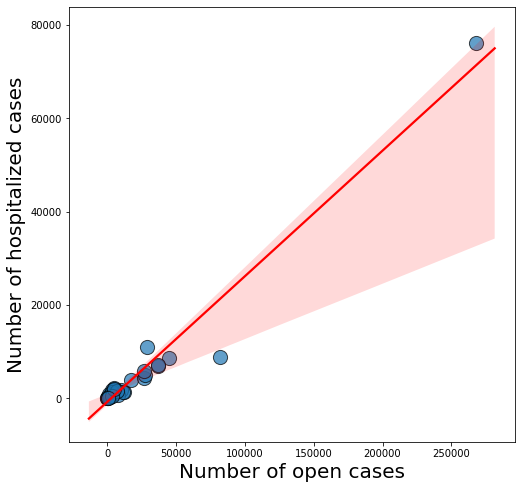

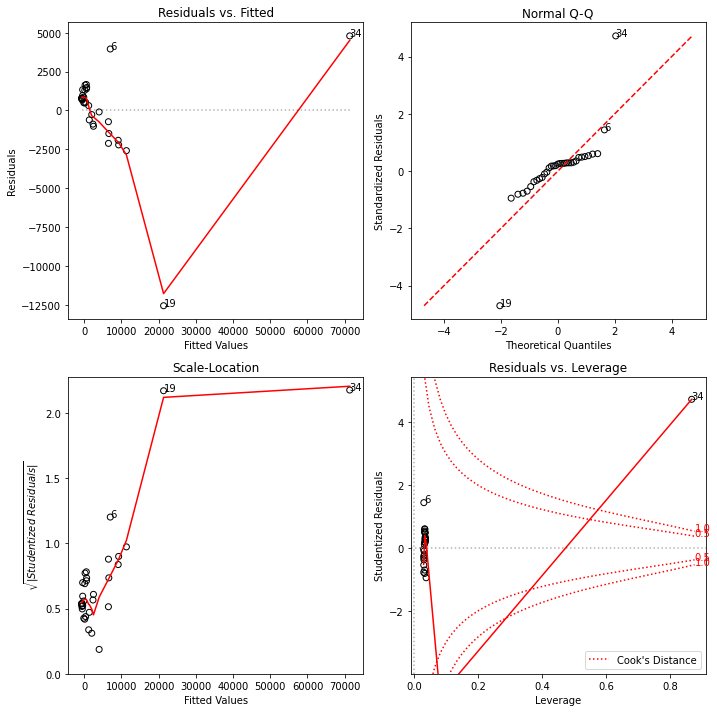

In [6]:
# Plot hospitalization vs. open cases
# Remove NA from hospitalized and open column
USCovidCorrectedFr = USCovidFr.dropna(subset=['hospitalized', 'open'])
plt.figure(figsize=(8,8))
sns.regplot(x="open",
            y="hospitalized",
            data=USCovidCorrectedFr,
            scatter_kws={'alpha':0.7,
                         'edgecolor':'k',
                         's':200},
            line_kws={'color':'red'});
plt.xlabel("Number of open cases", fontsize=20);
plt.ylabel("Number of hospitalized cases", fontsize=20);

# Check using metrics and diagnostic plots
model = smf.ols(formula='hospitalized ~ open', data=USCovidCorrectedFr)
results = model.fit()
print(results.summary())

dpR.all4DiagnosticPlots(results)

In [15]:
# Actually including NY in the analysis doesn't look too bad!
# Check the state doing poorly compared to others in terms of hospitalization
USCovidCorrectedFr['pcPositive'] = USCovidCorrectedFr.apply(lambda row: row['positive']/(row['positive'] + row['negative']) if row['positive'] + row['negative'] > 0. else 0., axis=1)
USCovidCorrectedFr['pcHospitalized'] = USCovidCorrectedFr.apply(lambda row: row['hospitalized']/row['open'] if row['open'] > 0. else 0., axis=1)

USCovidCorrectedForPlottingFr = USCovidCorrectedFr[USCovidCorrectedFr['pcHospitalized'] < 1.]
fig = px.scatter(USCovidCorrectedForPlottingFr,
                 x='open',
                 y='hospitalized',
                 color='pcPositive',
                 size = 'pcHospitalized',
                 hover_data=['state'],
#                  text='state',
                 trendline="ols") 

fig.update_traces(line=dict(width=4,
                            color='burlywood'), selector=dict(type="scatter", mode="lines"))
fig.update_traces(marker=dict(line=dict(width=1,
                                        color='DarkSlateGrey'),
                              opacity=0.7),
                  selector=dict(mode='markers'))
fig.update_layout(title='Hospitalization vs. Open Cases',
                  xaxis_title="Number of open cases",
                  yaxis_title="Number of hospitalizations",)
# fig.update_traces(textposition='top center')
fig.show()

# Save image
fig.write_image(os.path.join('screenshots', 'hospitalizationVsOpenCases_USStates.PNG'))

fig.write_html(os.path.join('screenshots', 'hospitalizationVsOpenCases_USStates.html'))

In [8]:
# Look out for Row 34 - NY
USCovidFr.loc[34,]['state']

'NY'

                            OLS Regression Results                            
Dep. Variable:           hospitalized   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     96.13
Date:                Wed, 20 May 2020   Prob (F-statistic):           7.23e-11
Time:                        12:59:50   Log-Likelihood:                -278.32
No. Observations:                  32   AIC:                             560.6
Df Residuals:                      30   BIC:                             563.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    709.4774    327.876      2.164      0.0

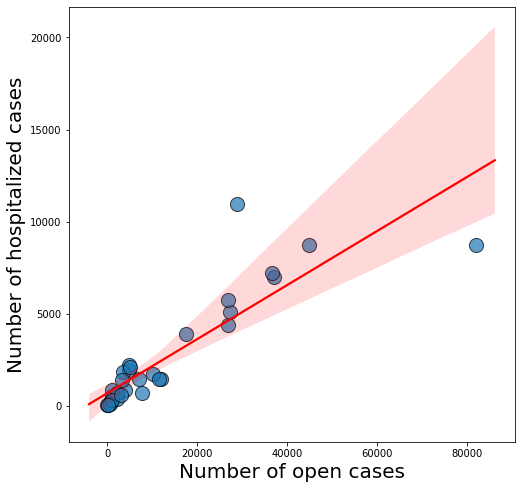

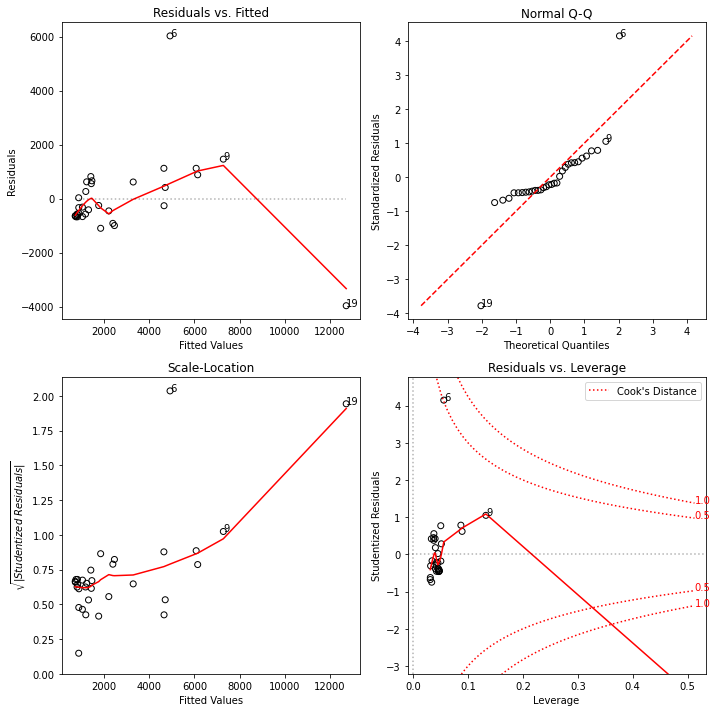

In [9]:
# Plot hospitalization vs. open cases except NY
USCovidWithoutNYFr = USCovidCorrectedFr[USCovidCorrectedFr['state'] != 'NY']
plt.figure(figsize=(8,8))
sns.regplot(x="open",
            y="hospitalized",
            data=USCovidWithoutNYFr,
            scatter_kws={'alpha':0.7,
                         'edgecolor':'k',
                         's':200},
            line_kws={'color':'red'});
plt.xlabel("Number of open cases", fontsize=20);
plt.ylabel("Number of hospitalized cases", fontsize=20);

# Check using metrics and diagnostic plots
model = smf.ols(formula='hospitalized ~ open', data=USCovidWithoutNYFr)
results = model.fit()
print(results.summary())
dpR.all4DiagnosticPlots(results)

In [10]:
print(results.params)

Intercept    709.477372
open           0.146650
dtype: float64


In [11]:
fig = px.scatter(USCovidWithoutNYFr,
                 x='open',
                 y='hospitalized',
                 color='pcPositive',
                 size = 'pcHospitalized',
                 hover_data=['state'],
                 text='state',
                 trendline="ols") 

fig.update_traces(line=dict(width=4,
                            color='red'), selector=dict(type="scatter", mode="lines"))
fig.update_traces(marker=dict(line=dict(width=1,
                                        color='DarkSlateGrey'),
                              opacity=0.6),
                  selector=dict(mode='markers'))
fig.update_traces(textposition='top center')

fig.show()

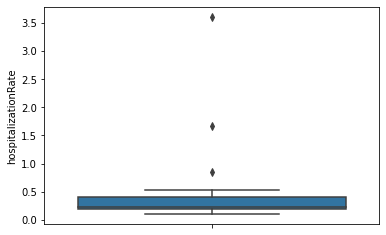

In [12]:
# Get hospitalization rates
USCovidFr['hospitalizationRate'] = USCovidFr['hospitalized']/USCovidFr['open']
sns.boxplot(y='hospitalizationRate',
            data=USCovidFr)

                              OLS Regression Results                             
Dep. Variable:     onVentilatorCurrently   R-squared:                       0.981
Model:                               OLS   Adj. R-squared:                  0.978
Method:                    Least Squares   F-statistic:                     404.4
Date:                   Wed, 20 May 2020   Prob (F-statistic):           3.90e-08
Time:                           13:01:10   Log-Likelihood:                -54.869
No. Observations:                     10   AIC:                             113.7
Df Residuals:                          8   BIC:                             114.3
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       65

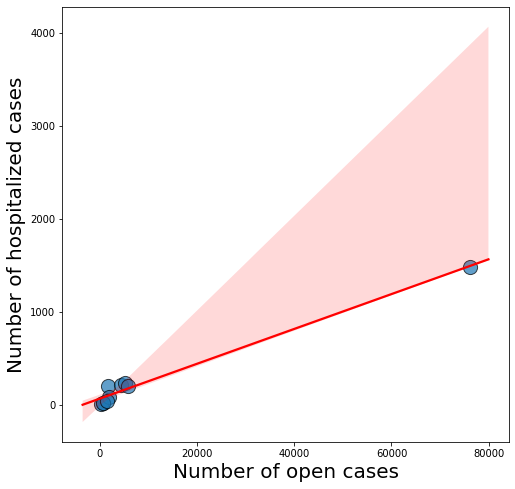

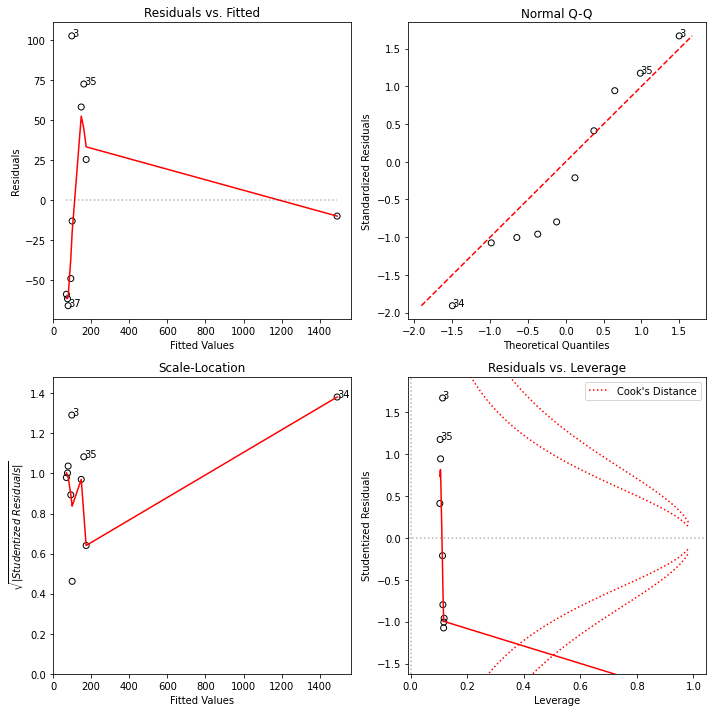

In [13]:
# Look at ventilator data
# Plot ventilator vs. hospitalized cases
# Remove NA from hospitalized and open column
USCovidCorrectedFr = USCovidFr.dropna(subset=['hospitalized', 'onVentilatorCurrently'])
plt.figure(figsize=(8,8))
sns.regplot(x="hospitalized",
            y="onVentilatorCurrently",
            data=USCovidCorrectedFr,
            scatter_kws={'alpha':0.7,
                         'edgecolor':'k',
                         's':200},
            line_kws={'color':'red'});
plt.xlabel("Number of open cases", fontsize=20);
plt.ylabel("Number of hospitalized cases", fontsize=20);

# Check using metrics and diagnostic plots
model = smf.ols(formula='onVentilatorCurrently ~ hospitalized', data=USCovidCorrectedFr)
results = model.fit()
print(results.summary())

dpR.all4DiagnosticPlots(results)

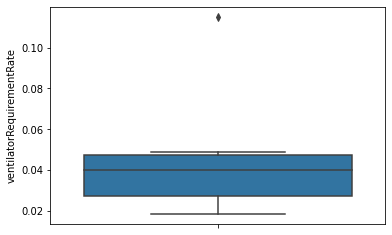

In [14]:
# Get ventilator required rates
USCovidFr['ventilatorRequirementRate'] = USCovidFr['onVentilatorCurrently']/USCovidFr['hospitalized']
sns.boxplot(y='ventilatorRequirementRate',
            data=USCovidFr)